In [32]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, plot_roc_curve, classification_report
import matplotlib.pyplot as plt

In [33]:
atp_df = pd.read_pickle('atp_cleaned_data.pkl')

In [34]:
atp_df.isna().sum()

draw_size             0
match_num             0
player_id             0
player_seed           0
player_height         0
player_age            0
best_of               0
minutes               0
ace                   0
double_fault          0
service_points_won    0
first_serve_made      0
first_serve_won       0
second_serve_won      0
serve_game            0
break_point_saved     0
break_point_faced     0
player_rank           0
player_rank_points    0
target                0
year                  0
month                 0
day                   0
surface_carpet        0
surface_clay          0
surface_grass         0
surface_hard          0
tourney_level_a       0
tourney_level_d       0
tourney_level_f       0
tourney_level_g       0
tourney_level_m       0
player_hand_l         0
player_hand_r         0
player_hand_u         0
round_br              0
round_er              0
round_f               0
round_qf              0
round_r128            0
round_r16             0
round_r32       

In [35]:
list(atp_df.columns)

['draw_size',
 'match_num',
 'player_id',
 'player_seed',
 'player_height',
 'player_age',
 'best_of',
 'minutes',
 'ace',
 'double_fault',
 'service_points_won',
 'first_serve_made',
 'first_serve_won',
 'second_serve_won',
 'serve_game',
 'break_point_saved',
 'break_point_faced',
 'player_rank',
 'player_rank_points',
 'target',
 'year',
 'month',
 'day',
 'surface_carpet',
 'surface_clay',
 'surface_grass',
 'surface_hard',
 'tourney_level_a',
 'tourney_level_d',
 'tourney_level_f',
 'tourney_level_g',
 'tourney_level_m',
 'player_hand_l',
 'player_hand_r',
 'player_hand_u',
 'round_br',
 'round_er',
 'round_f',
 'round_qf',
 'round_r128',
 'round_r16',
 'round_r32',
 'round_r64',
 'round_rr',
 'round_sf']

In [36]:
y = atp_df["target"]
X = atp_df.drop(["target"], axis=1)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
rf = RandomForestClassifier()

In [39]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [40]:
names = X.columns

In [41]:
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), 
             reverse=True))

Features sorted by their score:
[(0.1656, 'break_point_faced'), (0.0729, 'first_serve_won'), (0.0555, 'player_rank_points'), (0.0512, 'player_rank'), (0.0485, 'player_age'), (0.0479, 'second_serve_won'), (0.0478, 'break_point_saved'), (0.0468, 'service_points_won'), (0.0439, 'player_id'), (0.0407, 'match_num'), (0.0396, 'first_serve_made'), (0.0378, 'minutes'), (0.0347, 'day'), (0.0328, 'ace'), (0.0305, 'year'), (0.0279, 'player_height'), (0.0259, 'player_seed'), (0.0252, 'serve_game'), (0.0245, 'double_fault'), (0.0222, 'month'), (0.0122, 'draw_size'), (0.0067, 'surface_clay'), (0.006, 'surface_hard'), (0.005, 'round_r32'), (0.0044, 'best_of'), (0.0043, 'round_r16'), (0.004, 'player_hand_r'), (0.0039, 'round_r64'), (0.0038, 'player_hand_l'), (0.0036, 'surface_grass'), (0.0034, 'round_qf'), (0.0033, 'tourney_level_a'), (0.0031, 'tourney_level_m'), (0.0029, 'tourney_level_g'), (0.0026, 'round_r128'), (0.0024, 'round_sf'), (0.002, 'surface_carpet'), (0.0015, 'round_f'), (0.0011, 'round_r

In [42]:
feature_importance = sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), 
             reverse=True)

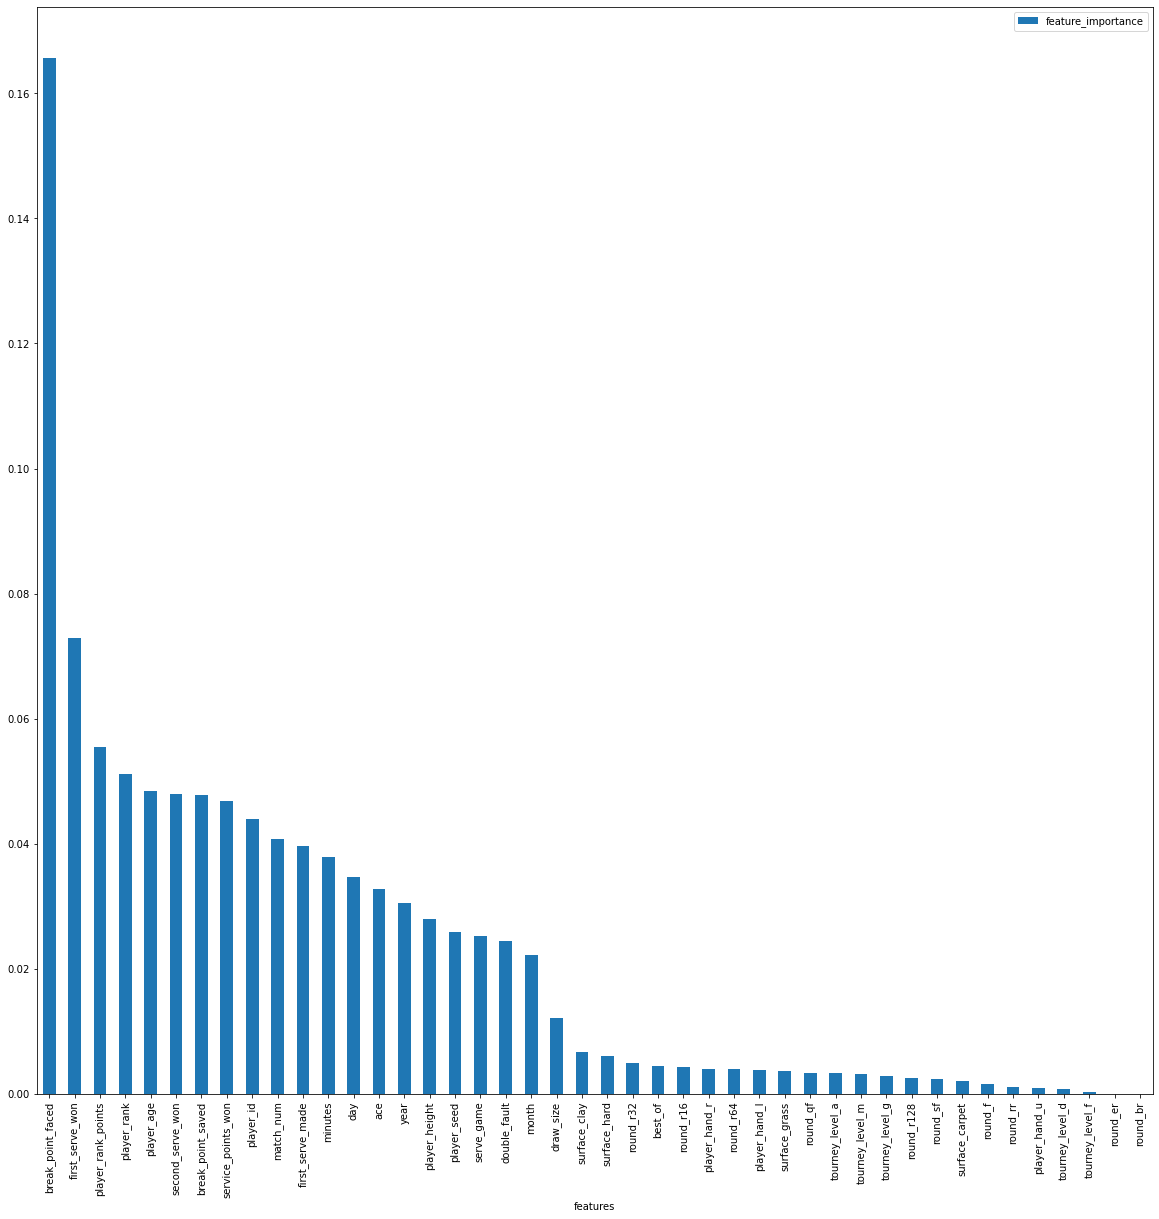

In [64]:
df = pd.DataFrame(feature_importance, columns=["feature_importance", "features"])
df.plot.bar(x="features", y = "feature_importance", figsize=(20,20))
plt.show()

In [47]:
accuracy_score(y_test, rf.predict(X_test))

0.7683298196298899

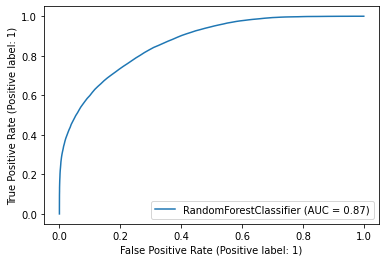

In [49]:
plot_roc_curve(rf, X_test, y_test)
plt.show()  

In [50]:
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77     19115
           1       0.77      0.76      0.77     19306

    accuracy                           0.77     38421
   macro avg       0.77      0.77      0.77     38421
weighted avg       0.77      0.77      0.77     38421



In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

In [52]:
logreg = LogisticRegression(solver= 'liblinear')

In [53]:
logreg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [54]:
accuracy_score(y_test, logreg.predict(X_test))

0.7883709429738945

In [57]:
bg = BaggingClassifier()

In [58]:
bg.fit(X_train, y_train)

BaggingClassifier()

In [60]:
accuracy_score(y_test, bg.predict(X_test))

0.7632024153457745